# Assignment 6: <h1><center> HIỆU CHỈNH CAMERA SỬ DỤNG OPENCV (CAMERA CALIBRATION)</center></h1>

# 1. Sử dụng ảnh bàn cờ để xác định tham số camera

### Tập ảnh bàn cờ khi dùng để xác định các thông số camera
#### - Thông số biết trước: kích thước bàn cờ: 12x8
#### - Tổng số ảnh: 14


In [1]:
# Các thư viện cần thiết
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import math

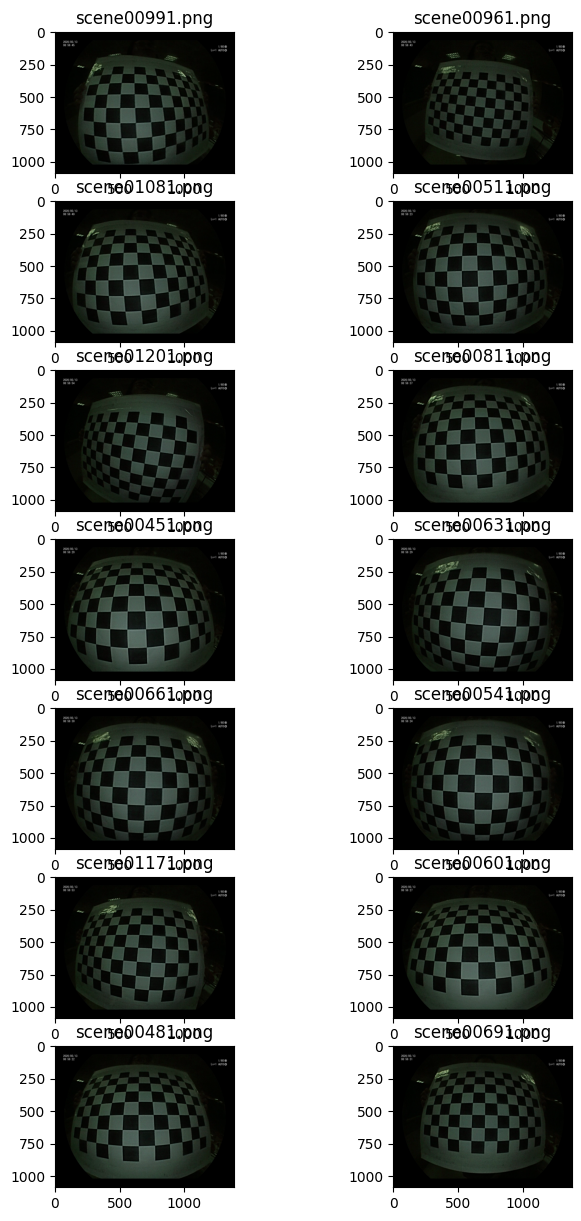

In [16]:
## Đọc ảnh bàn cờ
# UPDATE: Change data path 'data/chessboard' -> 'chessboard'
images=glob.glob('chessboard/*.png')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(8,15))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show()    

In [17]:
# termination criteria ; # điều kiện dừng thuât toán sau số lẩn lặp tối đa hoặc mức độ hội tụ của t toán đạt được
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01) 

In [18]:
# chessboard dimension (12 x 8). We need objpoints and imgpoints to have same number of entries and of same size
# inside conner points
cbrow = 11 
cbcolumn = 7

In [19]:
# Chuẩn bị object points giống như: (0,0,0), (1,0,0), ...., (10,6,0). Tọa độ Z = 0 
objp = np.zeros((cbrow*cbcolumn, 3), np.float32)
objp[:, :2] = np.mgrid[0:cbrow, 0:cbcolumn].T.reshape(-1, 2)
# objp[0:22,:]

In [20]:
# Mảng đề lưu object points và image points từ toàn bộ các ảnh đảm bảo 2 mảng này có cùng kích thước
objpoints = []  # lưu trữ tọa độ 3d trong không gian thế giới thực (3d point in real world space)
imgpoints = []   # Lưu tọa độ 2D trên ảnh (2d point in image plane)

In [21]:
# Lấy toàn bộ ảnh bàn cờ và phát hiện các điểm góc trên từng ảnh
# Ghép tương ứng tọa độ 2D phát hiện được và tọa độ 3D
# Các hàm sử dụng: 
#                 findChessboardCorners: tìm các góc bên trong bàn cờ
#                 cornerSubPix: hiệu chỉnh để tăng độ chính xác của góc
# https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga93efa9b0aa890de240ca32b11253dd4a
# https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga354e0d7c86d0d9da75de9b9701a9a87e

# UPDATE: Change data path 'data/chessboard' -> 'chessboard'
images = glob.glob('chessboard/*.png')
i = 0
for fname in images:
    i = i + 1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tìm góc của bàn cờ (find the chessboard corners)
    ret, corners = cv2.findChessboardCorners(gray, (11, 7), flags=cv2.CALIB_CB_FILTER_QUADS + cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK)
    
    # Nếu tìm thấy, thêm vào các điểm của đối tượng, điểm của ảnh (sau khi tinh chỉnh) (if found, add object points, image points (after refining them))
    if ret == True:
        corners2 = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        objpoints.append(objp)
        
        # Vẽ và hiển thị các góc (Draw and display the corners)
        img = cv2.drawChessboardCorners(img, (cbrow, cbcolumn), corners2, ret)
        cv2.imshow('Image', img)
        #cv2.waitKey(0)
    else:
        print(f"Cannot find the chessboard corners for {fname}. Continue..")


cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/giabao/.local/lib/python3.10/site-packages/cv2/qt/plugins"


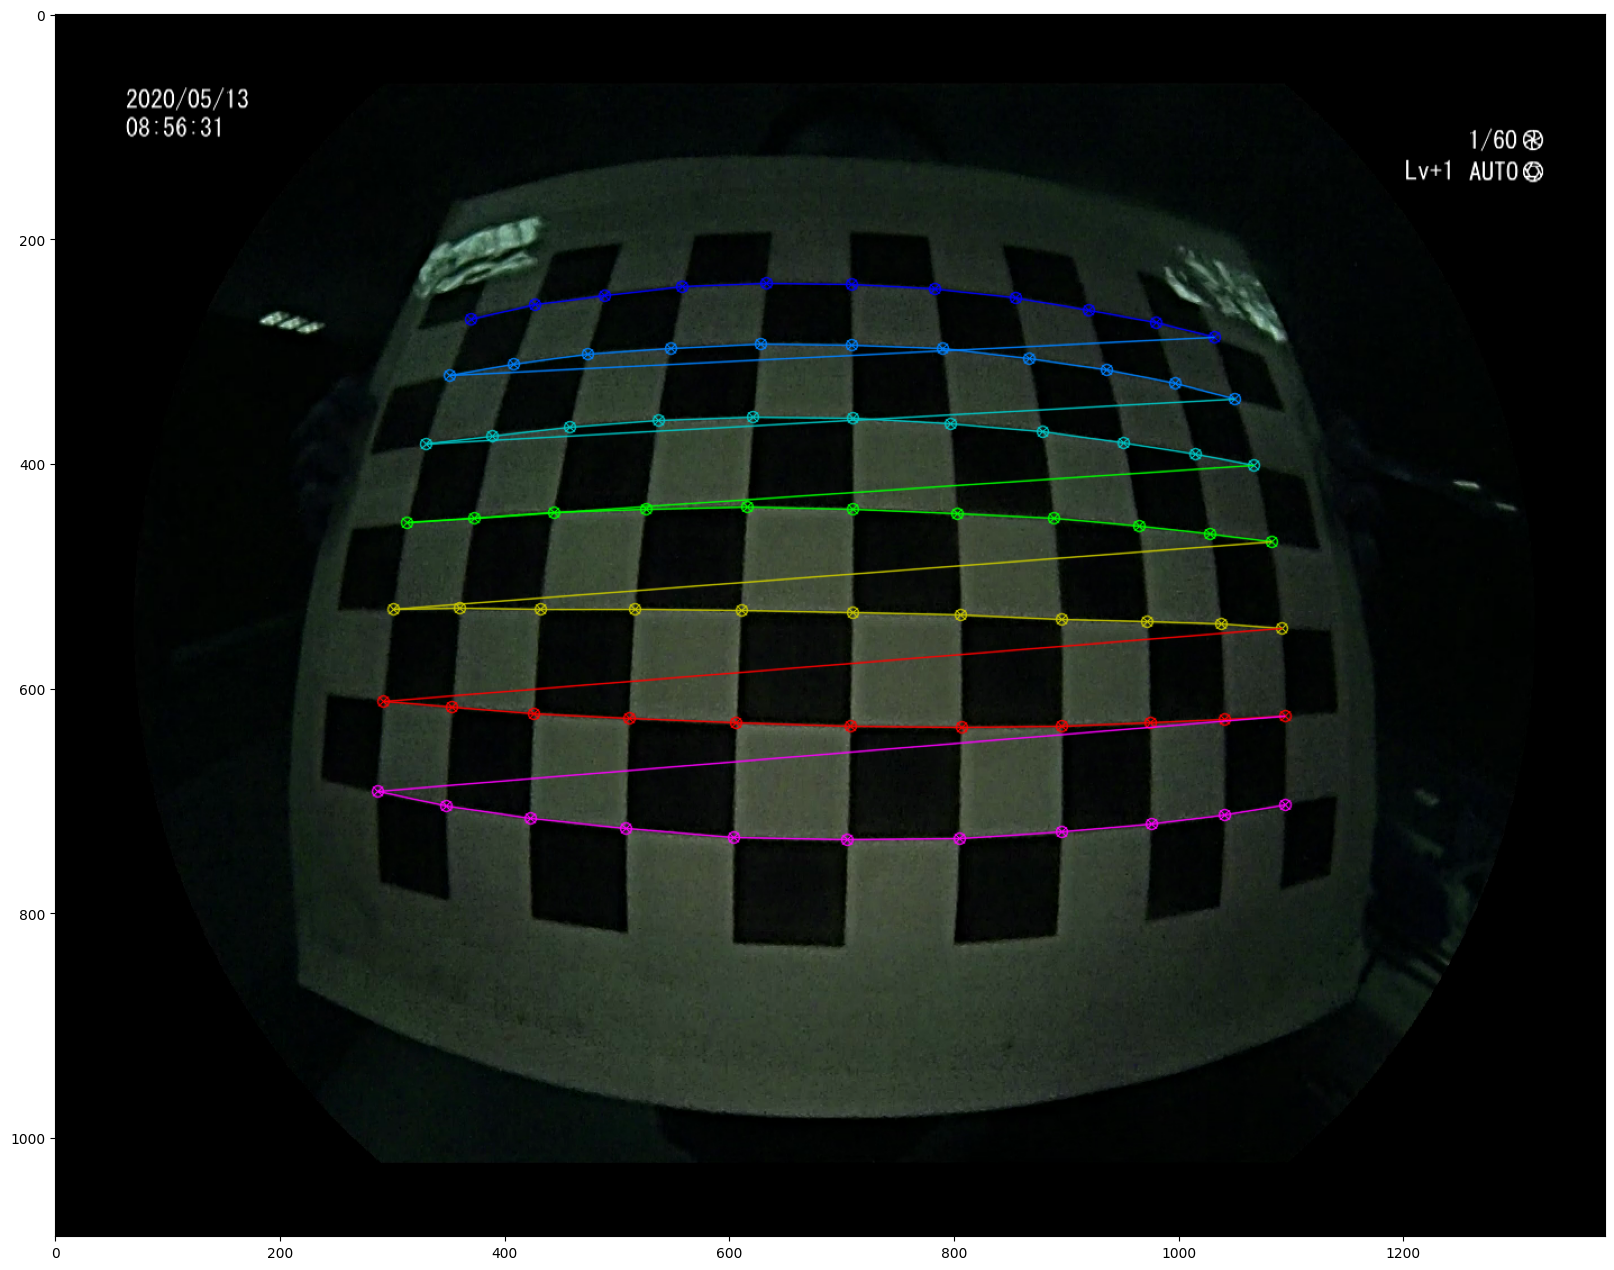

In [22]:
## VD 1 ảnh với các góc được tìm thấy
# Các góc được nối với nhau theo thứ tự trong mang impoints, tương ứng với thứ tự các điểm 3D được lưu trong objpoint

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera()

In [24]:
# Tìm camera metrix
##### Hiệu chỉnh (CALIBRATION) ######
# https://docs.opencv.org/3.4.16/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d

# mtx: camera metrix (camera intrinsic matrix  )
# dist: distorsion coefficients 
# rvecs: Output vector of rotation vectors (Rodrigues ) estimated for each pattern view
# tvecs : Output vector of translation vectors estimated for each pattern view

# ========= Complete this code ==========
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
#     ..., ..., gray.shape[::-1], None, None, flags=cv2.CALIB_RATIONAL_MODEL) 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# =======================================
dist = np.array(dist)

In [25]:
# distorsion coefficients 
dist

array([[-0.32413201,  0.10573536, -0.00213725, -0.00089117, -0.01526277]])

In [26]:
# camera intrinsic metrix
mtx

array([[558.79857998,   0.        , 678.01757429],
       [  0.        , 560.52370168, 566.12924161],
       [  0.        ,   0.        ,   1.        ]])

In [27]:
# Output vector of rotation vectors (Rodrigues ) estimated for each pattern view
rvecs[0]
# rotMat, jab = cv2.Rodrigues(rvecs[0])
# rotMat

array([[-0.3105085 ],
       [-0.17307304],
       [-0.03309792]])

In [28]:
# Vector of translation vectors estimated for each pattern view
tvecs

(array([[-3.65135519],
        [-2.66251927],
        [ 5.22291359]]),
 array([[-5.22524593],
        [-3.37697844],
        [ 7.99839184]]),
 array([[-4.52506698],
        [-3.3624    ],
        [ 5.09104042]]),
 array([[-4.305949  ],
        [-3.1255375 ],
        [ 4.49640208]]),
 array([[2.60156783],
        [4.85066333],
        [4.5585581 ]]),
 array([[-4.55143485],
        [-3.72939198],
        [ 5.31090262]]),
 array([[-5.00693465],
        [-3.77460081],
        [ 5.03044641]]),
 array([[-5.62052399],
        [-2.63583144],
        [ 5.00377805]]),
 array([[-4.79211162],
        [-2.68932075],
        [ 4.72882455]]),
 array([[-5.29521529],
        [-2.45420738],
        [ 4.35531764]]),
 array([[-6.09704537],
        [-3.42010858],
        [ 6.48155294]]),
 array([[-5.26045007],
        [-3.88646478],
        [ 5.92467571]]),
 array([[-5.37556496],
        [-4.02935576],
        [ 5.86967067]]),
 array([[-4.59822103],
        [-4.363491  ],
        [ 6.46122031]]))

## 2. UNDISTORTION đối với ảnh bàn cờ ban đầu (ảnh dùng để xác định tham số trong và tham số ngoài)

In [29]:
##### UNDISTORTION #####
# UPDATE: Check if result folder exists. If no, make new one. 
output_folder = "chessboard/result"
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
    
img1 = cv2.imread('chessboard/scene00451.png')
h, w = img1.shape[:2]

# Tìm ma trận tham số trong của camera (không biến dạng) từ tham số camera cũ và hệ số biến dạng

# Compute the new camera intrinsic matrix based on the free scaling parameter (alpha)
# alpha: Free scaling parameter between 0 (when all the pixels in the undistorted image are valid) 
# and 1 (when all the source image pixels are retained in the undistorted image)

# COMPLETE THIS CODE
alpha = 1
newcameramtx, roi = cv2.getOptimalNewCameraMatrix() # COMPLETE THIS CODE

print("newcameramtx = \n", newcameramtx)
# =============================

# The original camera intrinsic matrix, distortion coefficients, the computed new camera intrinsic matrix, 
# and newImageSize should be passed to initUndistortRectifyMap to produce the maps for remap.
resultImg = glob.glob('chessboard/*.png')
for rimg in resultImg:
    img = cv2.imread(rimg)
    
    # undistort
    # COMPLETE THIS CODE
    mapx, mapy = cv2.initUndistortRectifyMap(
        ..., ..., None, newcameramtx, ..., cv2.CV_32FC1)  # Computes the undistortion and rectification transformation map. 
            # The function computes the joint undistortion and rectification transformation 
            # and represents the result in the form of maps for remap. 
            # The undistorted image looks like original, as if it is captured with 
            # a camera using the camera matrix =newCameraMatrix and zero distortion.
    # =============================        
            
    dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR) #It is the process of taking pixels from one place in the image and locating them in another position in a new image.
    
    # Ghi ảnh kết quả
    path = f"{output_folder}/Calibresult_" + \
        os.path.basename(rimg)
    cv2.imwrite(path, dst)

# Lỗi phép chiếu (re-projection error)
mean_error = 0
for i in range(len(objpoints)): # for each image, len(objpoints) = number of images used for calibration
    imgpoints2, _ = cv2.projectPoints(
        objpoints[i], rvecs[i], tvecs[i], mtx, dist) # chiếu 3D points lên image plan khi đã biết tham số trong và tham số ngoài 
    
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2) # tính sai số (L2) giữa các detected points (corners) và kết quả phép chiếu 
    mean_error += error

print("Mean error", mean_error/len(objpoints))
#cv2.waitKey(0)
#cv2.destroyAllWindows()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4238177586.py, line 18)

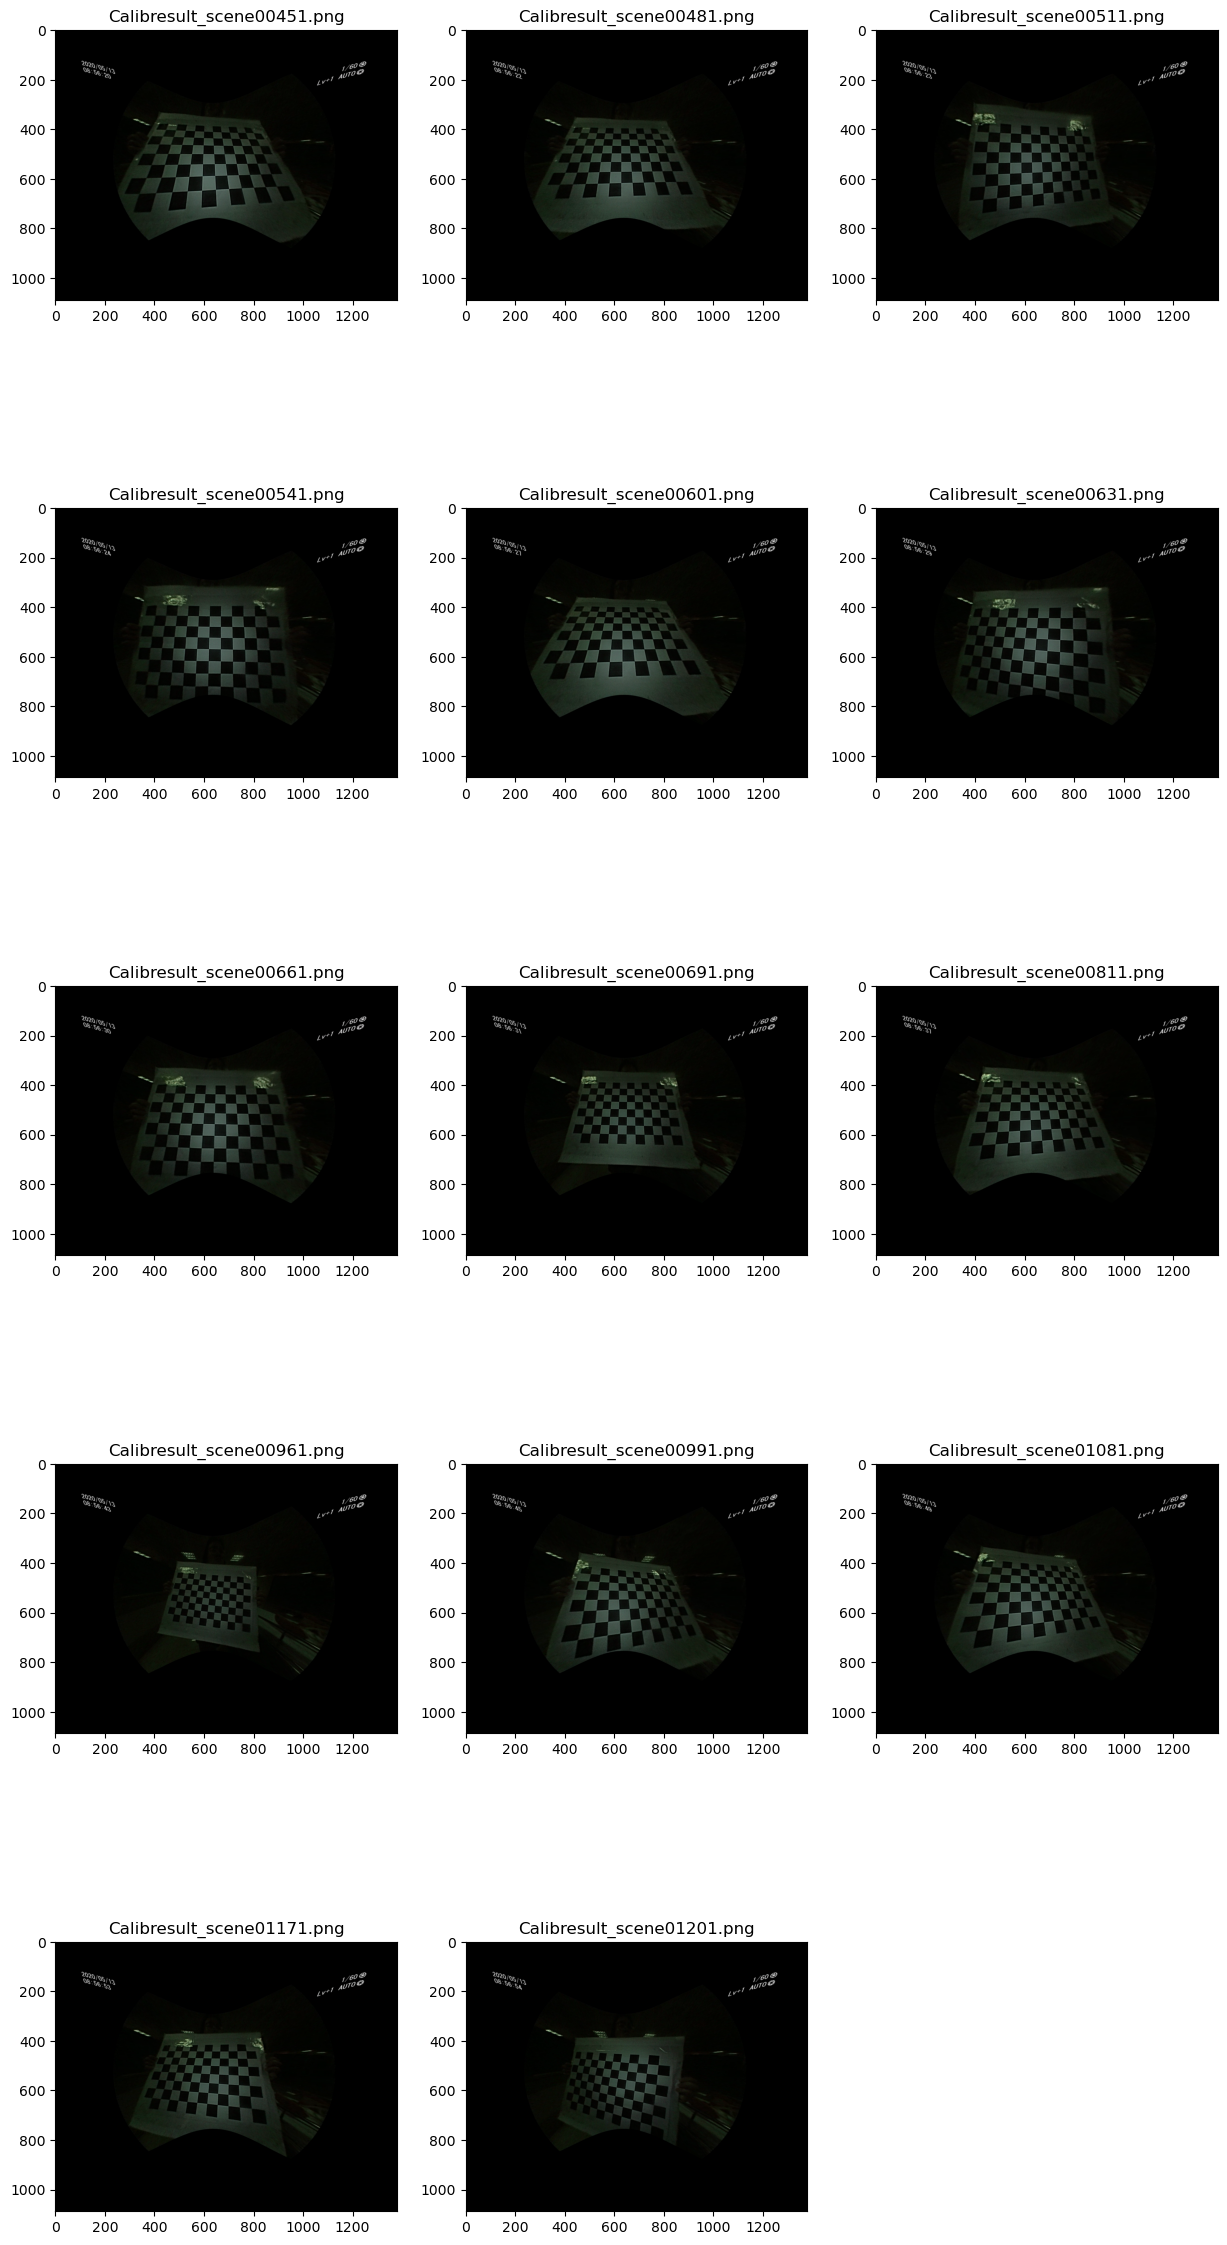

In [23]:
# Show the calibrated image
images=glob.glob('chessboard/result/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show()

## 3. UNDISTORTION đối với ảnh bàn cờ không dùng trong giai đoạn xác định tham số

In [34]:
##### UNDISTORTION #####
# UPDATE: Check if result folder exists. If no, make new one. 
chessboard_unknow_output_folder = "chessboard_unknow/result"
if not os.path.exists(chessboard_unknow_output_folder):
    os.mkdir(chessboard_unknow_output_folder)
    
img1 = cv2.imread("chessboard_unknow/scene00421.png")
h, w = img1.shape[:2]

# Xác định lại tham số trong (không distorsion) của camera từ thông số trong của cam và tham số distorsion
# Complete YOUR CODE HERE
alpha = 0
newcameramtx, roi = .......
# =================================
resultImg = glob.glob("chessboard_unknow/*.png")
for rimg in resultImg:
    img = cv2.imread(rimg)
    
    # undistort
    # complete YOUR CODE HERE
    ......
    # =================================
    
    # crop the image
    #x, y, w, h = roi
    #dst = dst[y:y+h, x:x+w]
    
    # Ghi ảnh kết quả
    path = f"{chessboard_unknow_output_folder}/Calibresult_" + \
        os.path.basename(rimg)
    cv2.imwrite(path, dst)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [2]:
# Display the calibrated images

# YOUR CODE HERE
 ...................

# =================================

IndentationError: unexpected indent (4220611687.py, line 4)